In [6]:
%load_ext autoreload
%autoreload 2
    
import chess
import time
import numpy as np

import final_submission_code
import help_functions

In [2]:
colors_based_on_turn = ['Black', 'White']

In [86]:
def make_a_move(bot, color, board, timeout, print_board_after_each_move, print_the_moves_eval):
    start_time = time.time()

    # try:
    # Perform the move using bot and the given color
    best_move = final_submission_code.get_move(color + 1, board)
    
    # Check if the operation exceeded the timeout
    if time.time() - start_time > timeout:
        print(colors_based_on_turn[color] + ' Lost on time')
        return board, True  # Return the position and indicate game over
    
    bin_board = help_functions.translate_to_bin(board)
    move_flip = help_functions.calculate_move(color, best_move, bin_board)
    new_board = help_functions.apply_move(bin_board, move_flip)
    new_board_visual = help_functions.transform_reversi_board(new_board)
    
    # Evaluate the move if required
    if print_the_moves_eval:
        # I need the move eval after the calculation
        move_eval = round(final_submission_code.evaluate_board(new_board), 2)
    else:
        move_eval = 0

    # Print the move details
    print(colors_based_on_turn[color] + "'s Move: " + help_functions.move_to_square_notation(best_move))
    if print_the_moves_eval:
        print('Move evaluation: ' + str(move_eval))
    if print_board_after_each_move:
        display(chess.Board(help_functions.board_to_fen(new_board_visual)))

    # Return the updated position and check if the game is over
    return new_board_visual, help_functions.is_game_over(new_board_visual)
    
    # except Exception as e:
    #     print("Error during the move generation of " + colors_based_on_turn[color] + f": {e}")
    #     return board, True  # In case of any error, return position and indicate game over


In [87]:
def bot_fight(bots_list, print_board_after_each_move, print_the_moves_eval, timeout):
    # I need to make the useful functions in another place- not where the bot is
    board = help_functions.STARTING_BOARD
    ind_game_over = False
    color_to_move = 0
    
    while not ind_game_over:
        board, ind_game_over = make_a_move(bots_list[color_to_move], color_to_move, board, timeout, print_board_after_each_move, print_the_moves_eval)
        color_to_move = 1 - color_to_move

    if not print_board_after_each_move:
        display(chess.Board(help_functions.board_to_fen(board)))

        
    help_functions.print_result(board)
    

Black's Move: f5
Move evaluation: -3.0


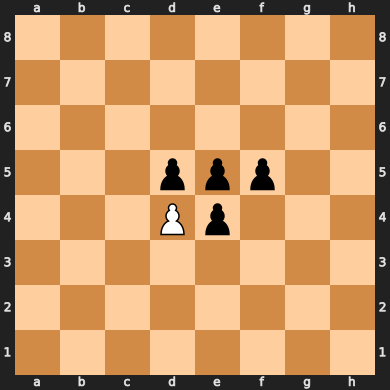

White's Move: f4
Move evaluation: 0.0


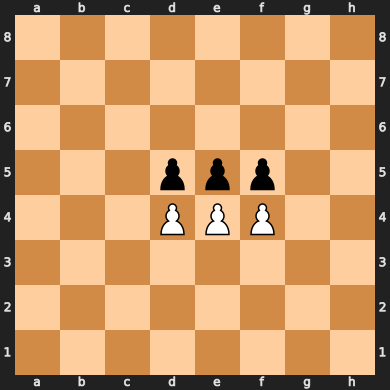

Black's Move: f3
Move evaluation: -14.0


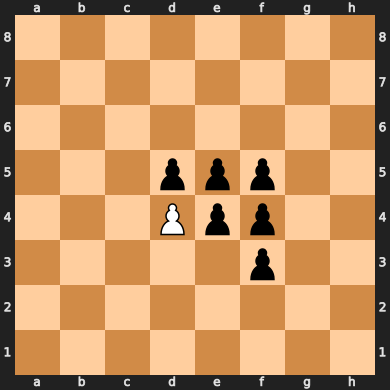

White's Move: f6
Move evaluation: 7.2


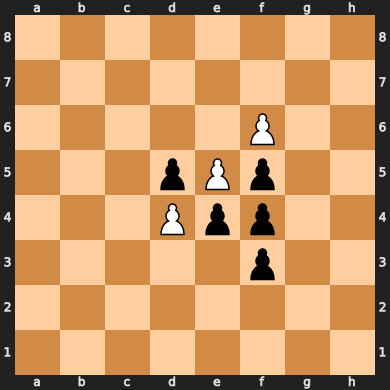

Black's Move: d6
Move evaluation: -1.5


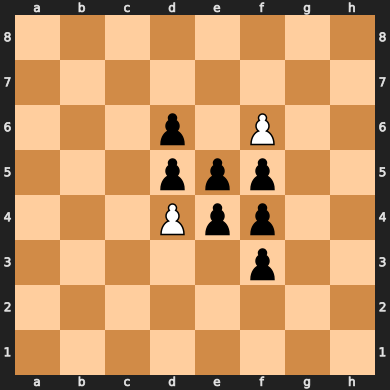

White's Move: f2
Move evaluation: 12.0


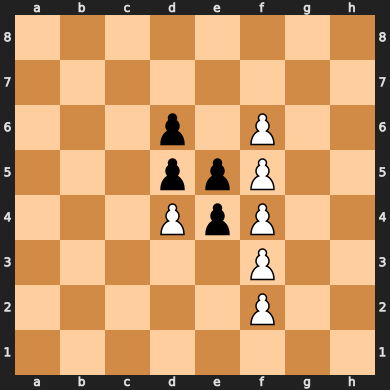

Black's Move: g5
Move evaluation: 11.7


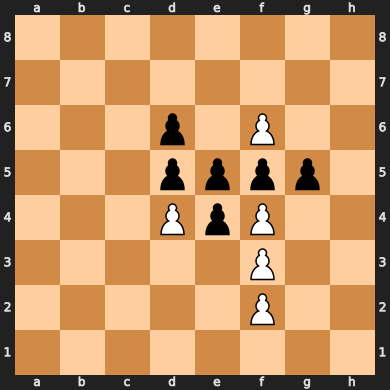

White's Move: c6
Move evaluation: 34.4


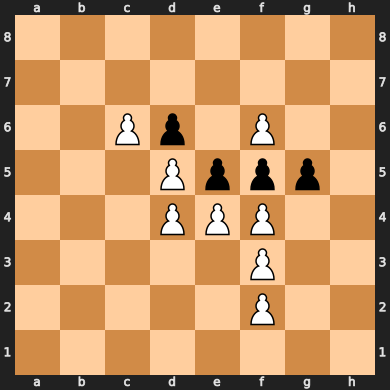

Black's Move: f1
Move evaluation: 2.05


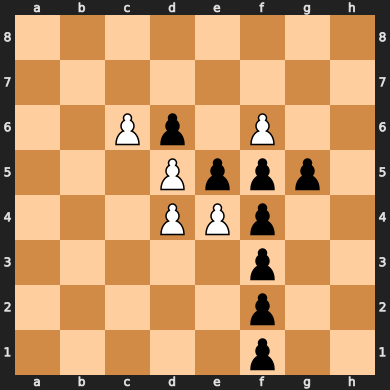

White's Move: h4
Move evaluation: -8.5


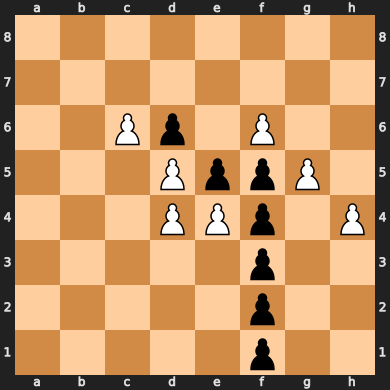

Black's Move: h6
Move evaluation: -12.0


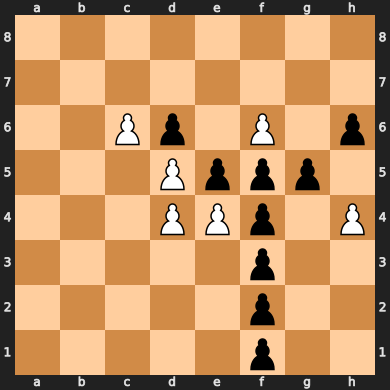

White's Move: e6
Move evaluation: -18.4


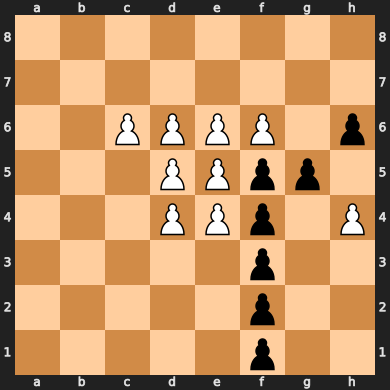

Black's Move: e7
Move evaluation: -26.6


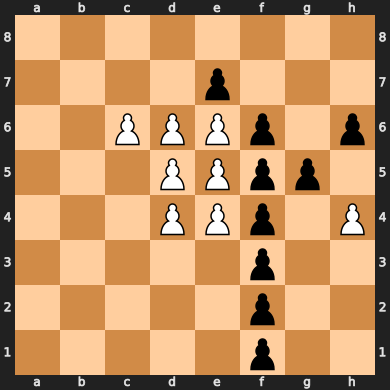

White's Move: g4
Move evaluation: -35.4


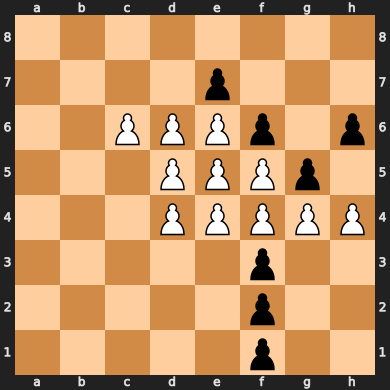

Black's Move: b6
Move evaluation: -36.35


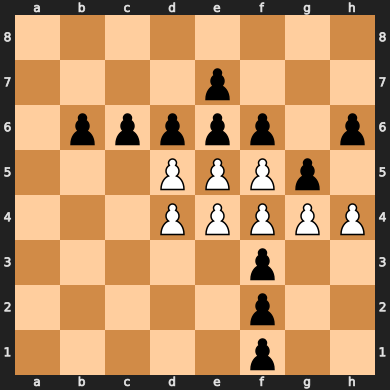

White's Move: e2
Move evaluation: -27.0


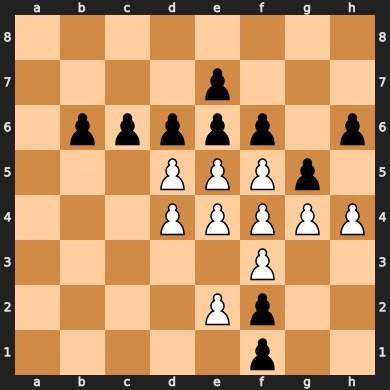

Black's Move: c5
Move evaluation: 1.15


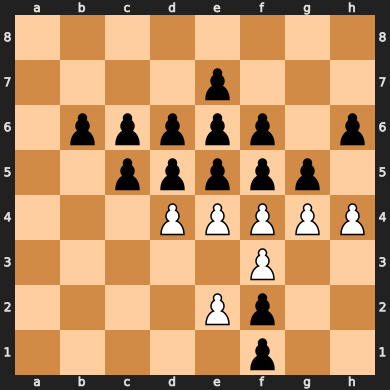

White's Move: d7
Move evaluation: -19.3


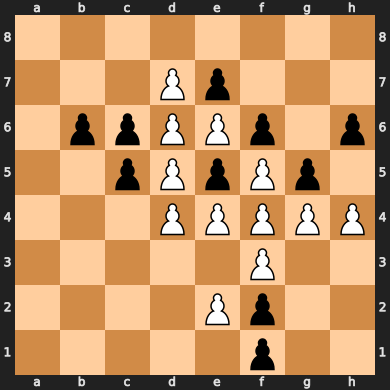

Black's Move: e8
Move evaluation: -9.65


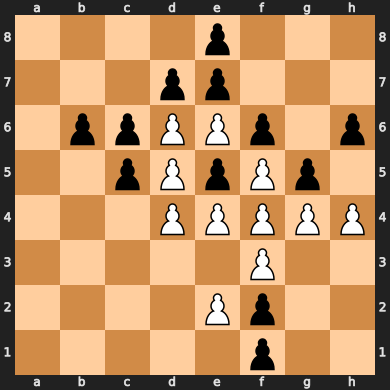

White's Move: c8
Move evaluation: -7.6


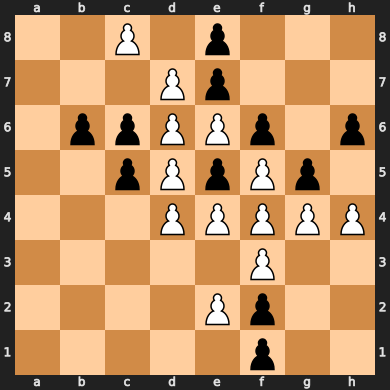

Black's Move: c7
Move evaluation: 16.25


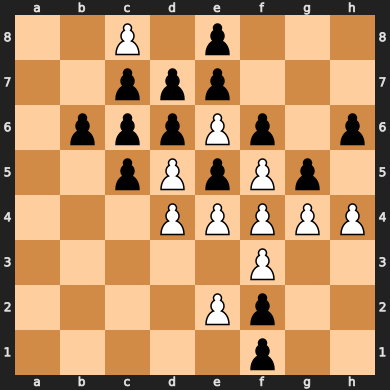

White's Move: h5
Move evaluation: 7.5


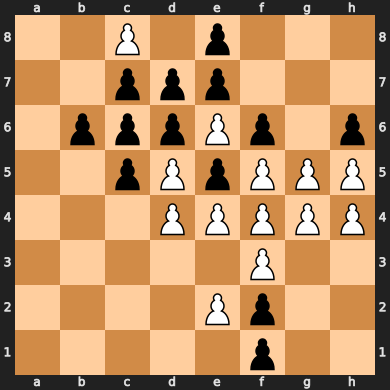

Black's Move: h3
Move evaluation: 12.9


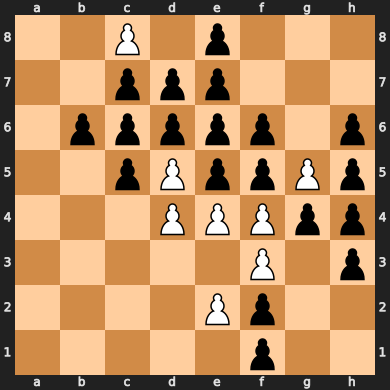

White's Move: g3
Move evaluation: 7.8


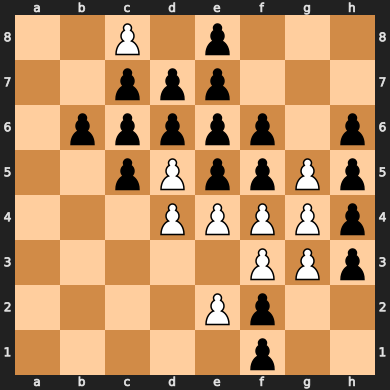

Black's Move: d2
Move evaluation: 42.05


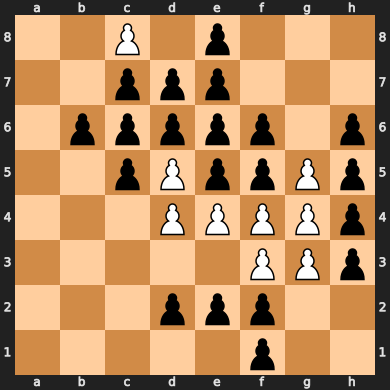

White's Move: f7
Move evaluation: -2.0


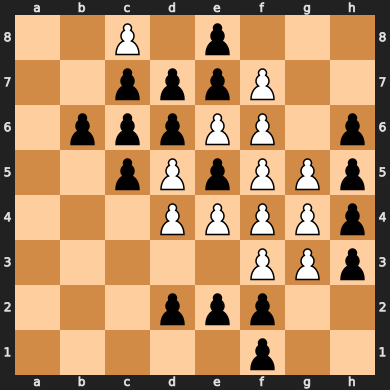

Black's Move: c3
Move evaluation: 27.4


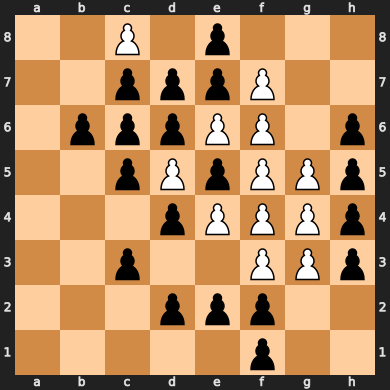

White's Move: d3
Move evaluation: 16.6


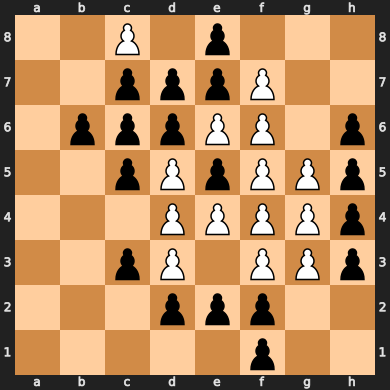

Black's Move: g6
Move evaluation: 69.85


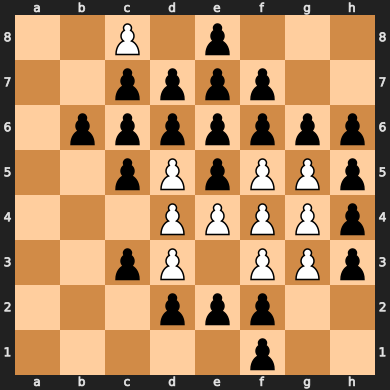

White's Move: f8
Move evaluation: 72.3


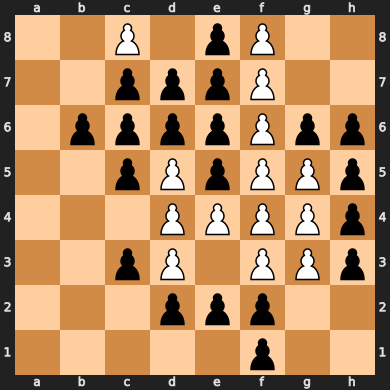

Black's Move: c2
Move evaluation: 107.5


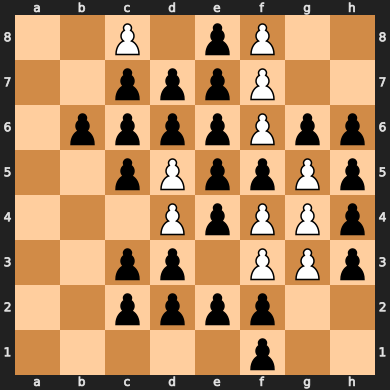

White's Move: d8
Move evaluation: 70.8


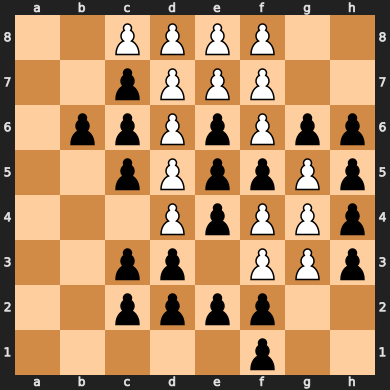

Black's Move: h2
Move evaluation: 130.6


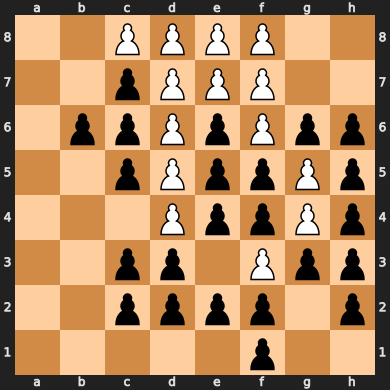

White's Move: e3
Move evaluation: 144.5


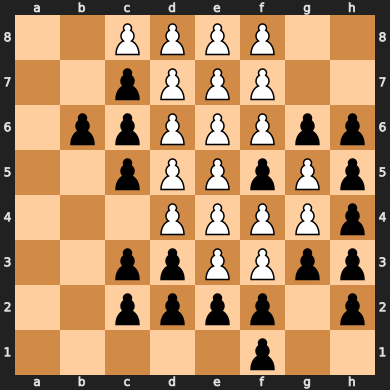

Black's Move: g2
Move evaluation: 231.6


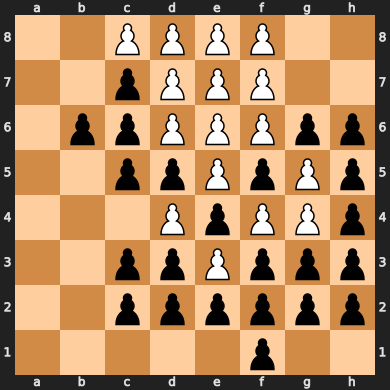

White's Move: b5
Move evaluation: 176.0


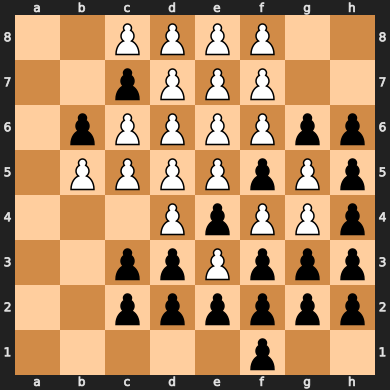

Black's Move: c4
Move evaluation: 199.4


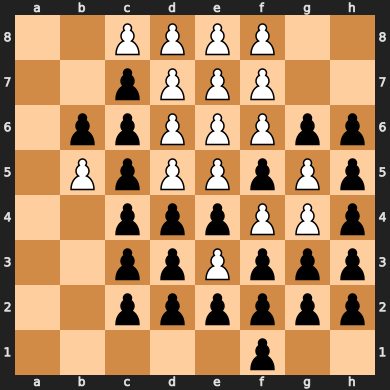

White's Move: b8
Move evaluation: 156.1


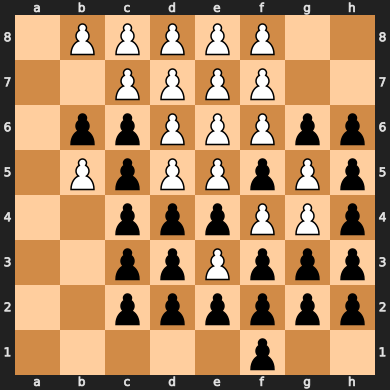

Black's Move: a6
Move evaluation: 212.45


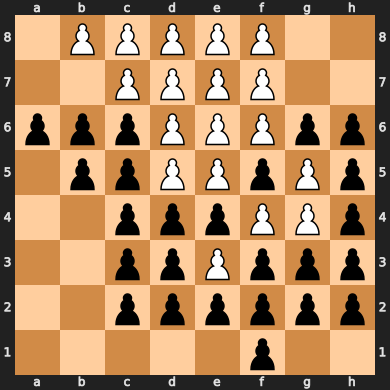

White's Move: h1
Move evaluation: 191.0


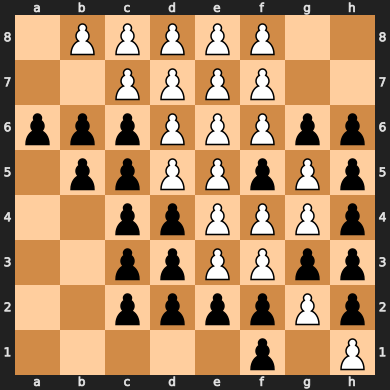

Black's Move: g7
Move evaluation: 302.75


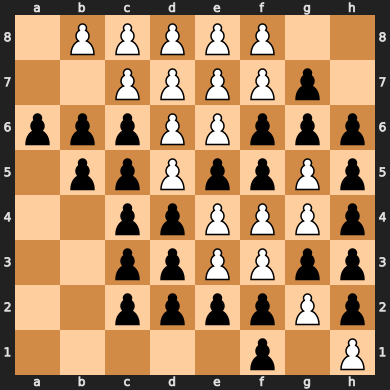

White's Move: b7
Move evaluation: 197.4


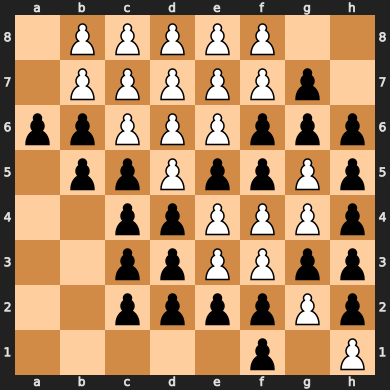

Black's Move: g1
Move evaluation: 420.0


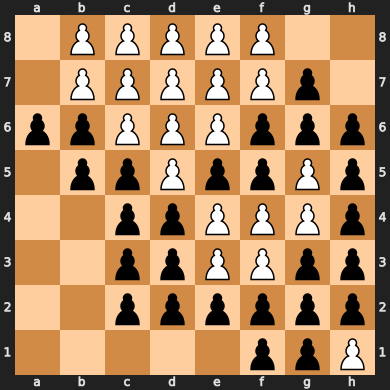

White's Move: a7
Move evaluation: 374.8


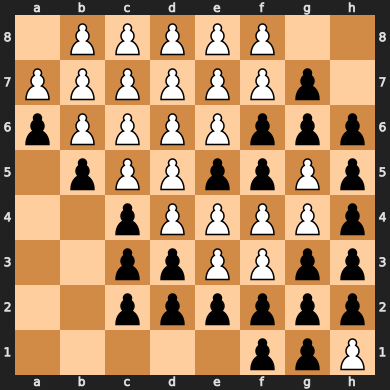

Black's Move: g8
Move evaluation: 450.5


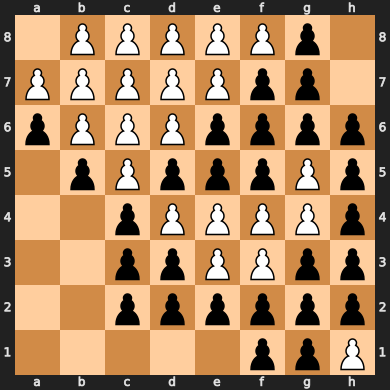

White's Move: a5
Move evaluation: 414.0


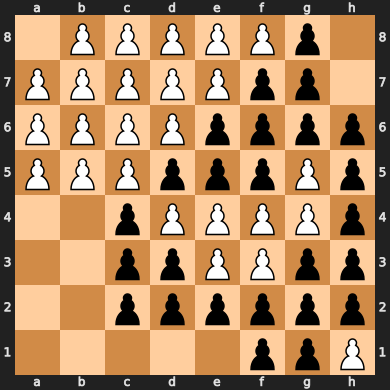

Black's Move: a8
Move evaluation: 476.25


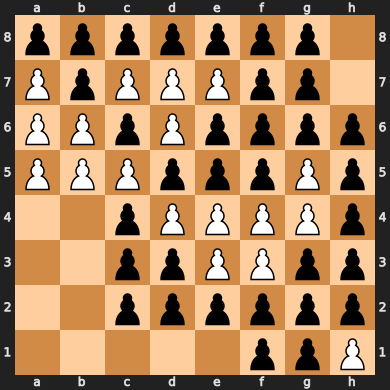

White's Move: h7
Move evaluation: 87.4


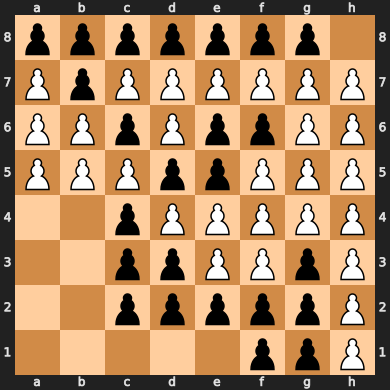

Black's Move: b4
Move evaluation: 213.45


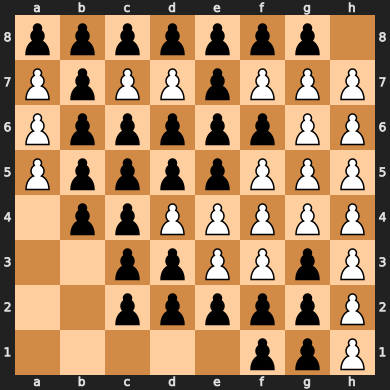

White's Move: c1
Move evaluation: 46.7


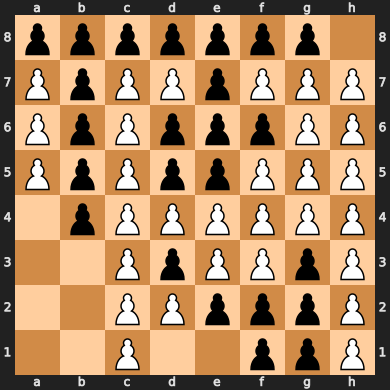

Black's Move: a4
Move evaluation: 75.75


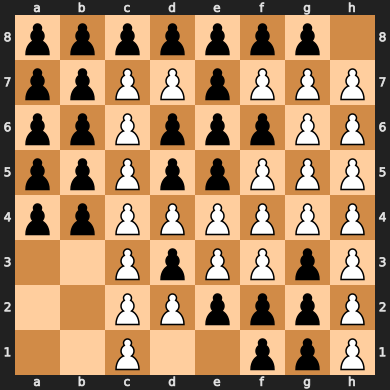

White's Move: a3
Move evaluation: 122.0


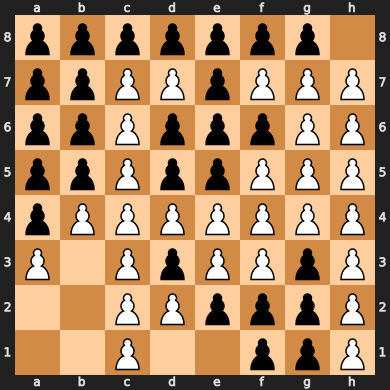

Black's Move: h8
Move evaluation: 75.0


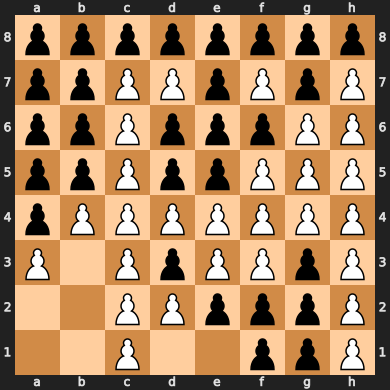

White's Move: e1
Move evaluation: 292.5


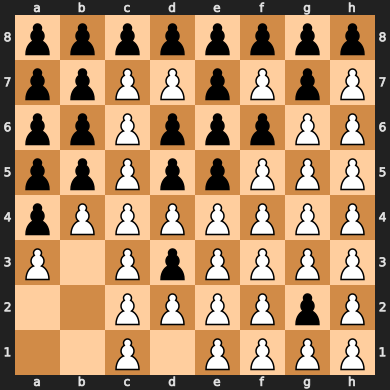

Black's Move: a2
Move evaluation: 231.0


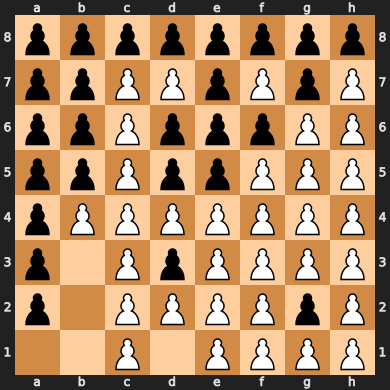

White's Move: b3
Move evaluation: 267.0


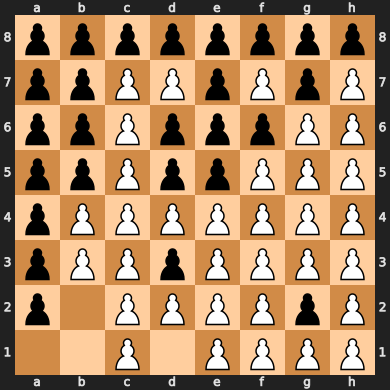

Black's Move: d1
Move evaluation: 159.0


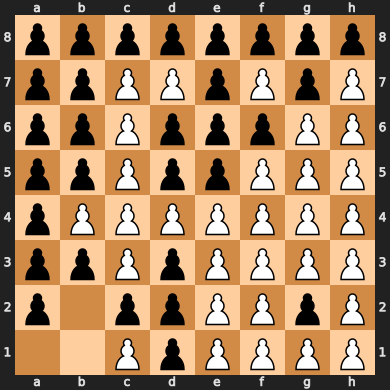

White's Move: b2
Move evaluation: 176.0


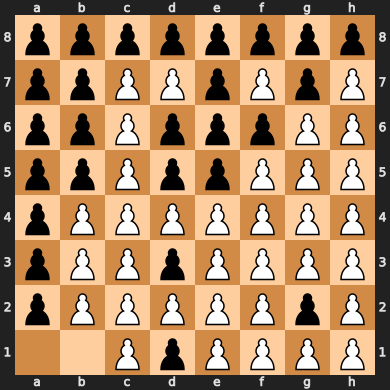

Black's Move: a1
Move evaluation: 31.0


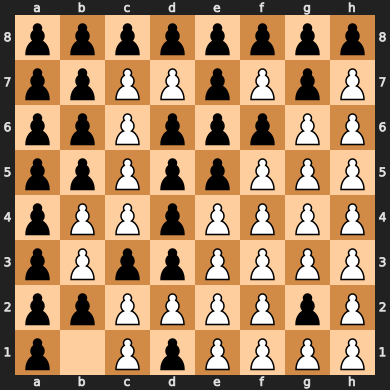

White's Move: b1
Move evaluation: -124.0


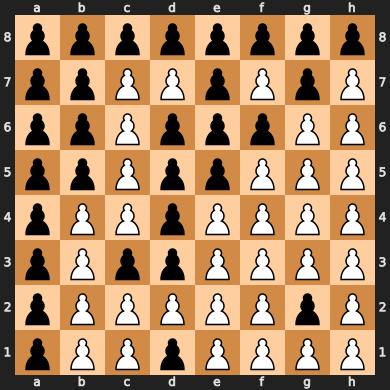

White won 34-30


In [94]:
bot_list = [0, 0]
print_board_after_each_move = True
print_the_moves_eval = True
timeout = 1

bot_fight(bot_list, print_board_after_each_move, print_the_moves_eval, timeout)

In [85]:
# Pawns switch colors
# Play against a human
# Use diffrent versions
# Eval after calculation
# Check legal move
# doc on functions

In [89]:
help_functions.STARTING_BOARD

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 2, 0, 0, 0],
 [0, 0, 0, 2, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [93]:
help_functions.transform_reversi_board(help_functions.STARTING_BIN_BOARD)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 2, 0, 0, 0],
 [0, 0, 0, 2, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]